<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/pavlo_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Strong upward trend
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y: [16, 14, 16, 19, 17, 16, 21, 24, 23, 22, 25, 20]
slope: 0.8076923076923077, intercept: 14.974358974358974
r: 0.8023332630617162, p: 0.001687377724314813, std_err: 0.19000957857380182
***
Strong downward trend
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y: [73, 65, 67, 54, 57, 59, 53, 41, 48, 44, 43, 49]
slope: -2.472027972027972, intercept: 68.01282051282051
r: -0.8774844165792921, p: 0.00017636031434394427, std_err: 0.4272654785951537
***
Weak downward trend (no trend)
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y: [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 105]
slope: -0.3601398601398601, intercept: 93.73076923076923
r: -0.12121783431849027, p: 0.7074581225576377, std_err: 0.9325889961854322
***


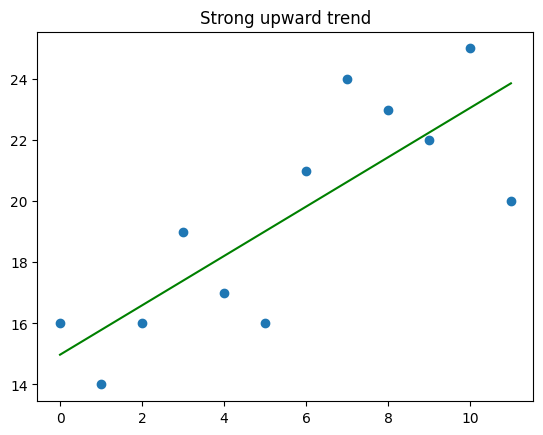

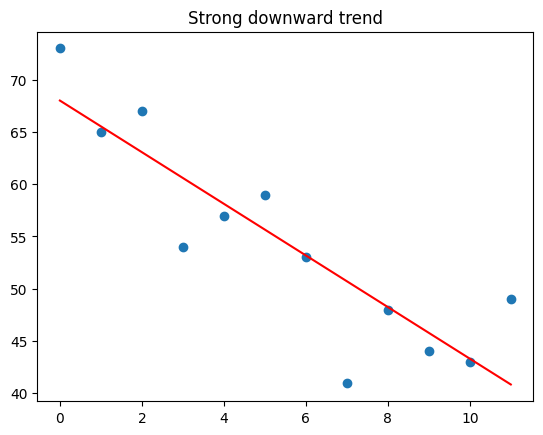

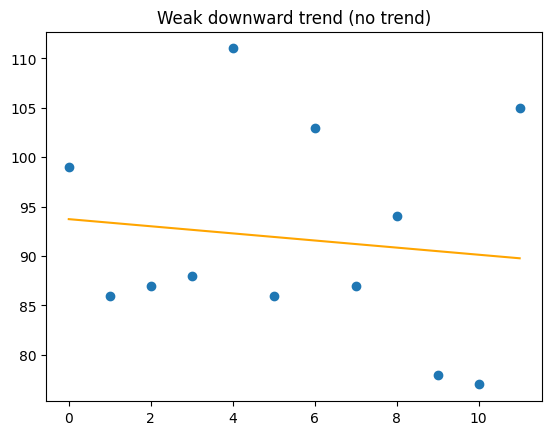

In [12]:
# https://medium.com/@pavlomorozov78/how-to-identify-trending-time-series-dda0f68a47fa

import matplotlib.pyplot as plt
from scipy import stats


# returns the list with arithmetic progression [0, 1, 2 ... length-1]
def generate_linear_progression(length):
    return [i for i in range(length)]


# calculates list of linear regression line points coordinates
def calculate_line_dot(slope, intercept, x):
    return [slope * x_element + intercept for x_element in x]


def calculate_regression(x, y, plot_title, line_color):
    # linear regression calculation
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    # linear regression results printed
    print(f'{plot_title}')
    print(f'x: {x}')
    print(f'y: {y}')
    print(f'slope: {slope}, intercept: {intercept}')
    print(f'r: {r}, p: {p}, std_err: {std_err}')
    print(f'***')
    # define model to show the line found with linear regression on chart
    mymodel = calculate_line_dot(slope, intercept, x)
    # creates new plot
    plt.figure()
    # showing the plot with input time series and linear regression line
    plt.title(plot_title)
    # plots the original time series
    plt.scatter(x, y)
    # plots the line calculated with linear regression
    plt.plot(x, mymodel, color=line_color)


def process_weak_down_trend():
    y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 105]
    x = generate_linear_progression(len(y))
    calculate_regression(x, y, "Weak downward trend (no trend)", 'orange')


def process_strong_down_trend():
    y = [73, 65, 67, 54, 57, 59, 53, 41, 48, 44, 43, 49]
    x = generate_linear_progression(len(y))
    calculate_regression(x, y, "Strong downward trend", 'red')


def process_strong_up_trend():
    y = [16, 14, 16, 19, 17, 16, 21, 24, 23, 22, 25, 20]
    x = generate_linear_progression(len(y))
    calculate_regression(x, y, "Strong upward trend", 'green')


process_strong_up_trend()
process_strong_down_trend()
process_weak_down_trend()

plt.show()

In [13]:
y = [73, 65, 67, 54, 57, 59, 53, 41, 48, 44, 43, 49]

import numpy as np

np.arange(len(y))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Coefficients: 
 [-2.472027972]

 Intercept: 
 68.0128205128205


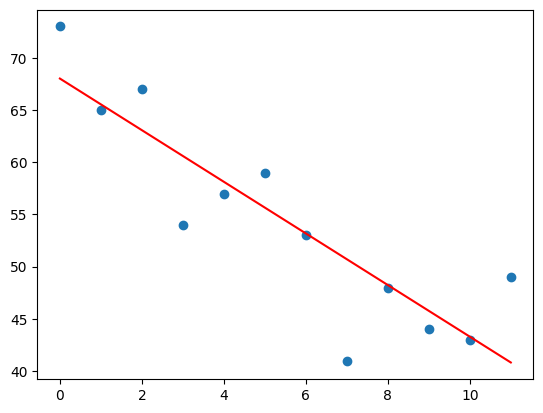

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


y =  [73, 65, 67, 54, 57, 59, 53, 41, 48, 44, 43, 49]
x =  np.arange(len(y)).reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)

np.set_printoptions(suppress=True, precision=10)

print('Coefficients: \n', reg.coef_)
print('\n Intercept: \n', reg.intercept_)

mymodel=[reg.coef_ * x_element + reg.intercept_ for x_element in x]

# creates new plot
plt.figure()
# showing the plot with input time series and linear regression line
#plt.title(plot_title)
    # plots the original time series
plt.scatter(x, y)
# plots the line calculated with linear regression
plt.plot(x, mymodel, color="red")

1/1 [==============================] - 0s 88ms/step
r2 score:  0.8445174331023261
Loss:  0.015312676317989826
Mean Squared Error:  0.015312676317989826


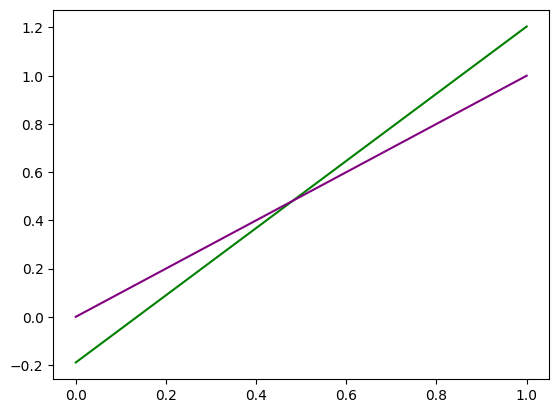

In [39]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

y =  [73, 65, 67, 54, 57, 59, 53, 41, 48, 44, 43, 49]
y=np.array(y)
x =  np.arange(len(y)).reshape(-1, 1)

# Normalize input data
scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(x)

# Define the model
model = Sequential()
model.add(Dense(1, input_dim=1))  # Single neuron with input dimension of 1

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])


# Fit the model on the data
model.fit(x, y, epochs=100, verbose=0)  # you can adjust the number of epochs

# Make predictions
Y_pred = model.predict(x)

# Calculate R² score
print('r2 score: ', r2_score(y, Y_pred))

# Evaluate the model
loss, mse = model.evaluate(x, y, verbose=0)
print('Loss: ', loss)
print('Mean Squared Error: ', mse)


plt.plot(x,Y_pred, color='green')
plt.plot(x,y, color='purple')

plt.show()


In [32]:
np.column_stack([x,y,Y_pred])

array([[ 0.          , 73.          ,  0.          ],
       [ 1.          , 65.          ,  0.0583089963],
       [ 2.          , 67.          ,  0.1166179925],
       [ 3.          , 54.          ,  0.1749271005],
       [ 4.          , 57.          ,  0.233235985 ],
       [ 5.          , 59.          ,  0.2915451527],
       [ 6.          , 53.          ,  0.3498542011],
       [ 7.          , 41.          ,  0.4081630409],
       [ 8.          , 48.          ,  0.4664719701],
       [ 9.          , 44.          ,  0.5247812271],
       [10.          , 43.          ,  0.5830903053],
       [11.          , 49.          ,  0.6413989663]])

In [19]:
type(y)

list